<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab13_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13 Clustering
## CSC 401 Lab
## Alex Lagarde
### 3/31/21

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import image as img

In [ ]:
image_path = 'dolphin.jfif'
image = img.imread(image_path)

if image is None:
    print('********************************************')
    print('*** Unable to load image', image_path)
    print('********************************************\n')

image.shape

(173, 291, 3)

Image loaded ( 173 x 291 )


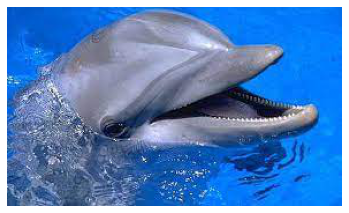

In [ ]:
# from skimage.transform import resize
# Resize to make things faster
# You can play with what fraction to use for resizing.
#image = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
         #     anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# get the height, width, and number of color channels (3)
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [ ]:
# reshape the image to be a list of pixels
# each pixel is a row with 3 columns (R G B)
pixels = image.reshape((h * w, 3))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]

pixels is (50343, 3)


array([[0.00784314, 0.34509804, 0.78039216],
       [0.        , 0.32941176, 0.76470588],
       [0.        , 0.31764706, 0.75294118],
       [0.        , 0.3254902 , 0.76078431],
       [0.00784314, 0.34509804, 0.78039216]])

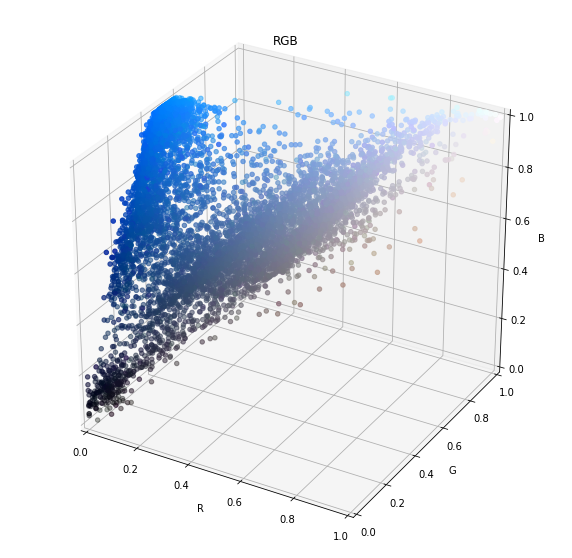

In [ ]:
# Show 3D plot of all the pixels in terms of red, green, and blue
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()

In [ ]:
# cluster the pixel intensities
k = 8
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')
# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)

Running Kmeans on list of 50343 pixels with k = 8 ...
Kmeans complete


In [ ]:
print('These are the locations of the cluster centers (R G B)')
clt.cluster_centers_

These are the locations of the cluster centers (R G B)


array([[0.25257731, 0.33887354, 0.49198908],
       [0.02486044, 0.49553096, 0.97553148],
       [0.42117272, 0.47428639, 0.60229792],
       [0.05146545, 0.27783531, 0.58306832],
       [0.5610048 , 0.59349577, 0.71648434],
       [0.08160549, 0.11618767, 0.22053624],
       [0.70162056, 0.73989674, 0.87037813],
       [0.04680671, 0.38473116, 0.80450502]])

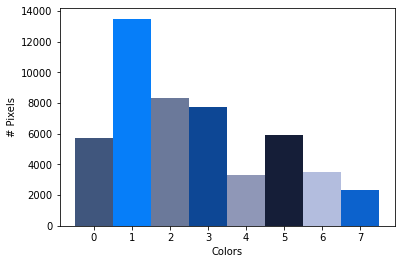

In [ ]:
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()

[[0.04680671 0.38473116 0.80450502]
 [0.04680671 0.38473116 0.80450502]
 [0.04680671 0.38473116 0.80450502]
 [0.04680671 0.38473116 0.80450502]
 [0.04680671 0.38473116 0.80450502]]


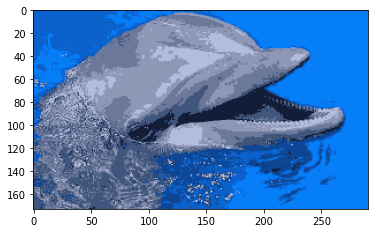

In [ ]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()

Ideal K Value

Since taking a higher K than necessary leads to higher costs, I chose k equal to eight clusters because on the surface of the original picture I could observe eight shades of color. I could see three shades of blue, three shades of grey, black, and white. 

How value of K affects runtime

As K increases, the runtime slows down the computational speed because there are more centroids as K increases. 

How number of points to be clustered affects runtime

If all the number of points are used, the clustering algorithm will run slower than if the number of points were reduced. The reason for this is because the more points means the more times the k centroids need to iterate their calculations. 

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1eb8ptJBgNsbtXVQ2tRSNt_GhP_4xej6b')
df.head(10)

,state,temp,snowfall
0,AL,46.5,1.6
1,AK,2.6,74.5
2,AZ,43.6,0.3
3,AR,41.5,5.2
4,CA,46.2,0.0
5,CO,25.8,19.1
6,CT,28.5,40.5
7,DE,36.1,20.2
8,FL,59.4,0.0
9,GA,47.8,0.7


In [ ]:
print('Running Kmeans on list of', df.shape[0], 'states...')

# TO DO -----------

# Create a KMeans model with k clusters
k = 4
clust = KMeans(n_clusters=k)

# Fit the model to the data (just temp and snowfall)
clust.fit(df[['temp', 'snowfall']])

# Predict the cluster labels based on the data
cluster_labels = clust.predict(df[['temp', 'snowfall']])

Running Kmeans on list of 50 states...


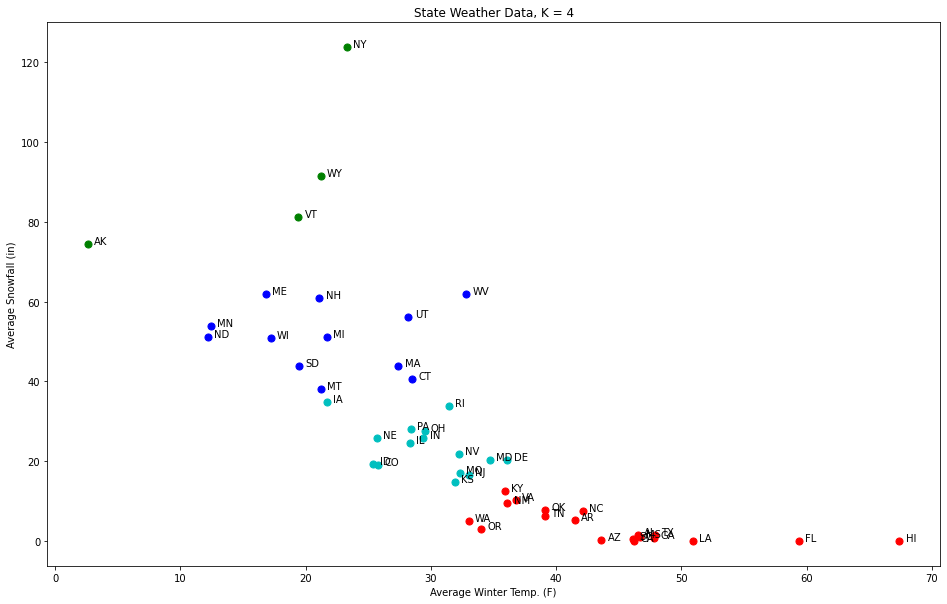

In [ ]:
# ---------------------------------------------------------------------
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = ' + str(k))
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

There are 4 groups: brutal winters, hard winters, mild winters, easy winters. These groups factor in snowfall more so than temperature. The easy winters were grouped due to the fact they had the warmer winter temperatures and almost no snowfall. The mild winters winters were grouped because they were in the 20-40 inches of snowfall range, had more snowfall than every state in the easy winters, and had cooler temperatures than almost all the easy winters states. Then, the hard winters entirely had more snowfall and generally cooler temperatures than mild winters. Finally, the brutal winter group had the most snowfall and generally had the coolest temperatures. 

To encourage K means to cluster more based off location, would require to weigh the temperature average into the algorithm more so than snowfall. This could be done by standardizing or normalizing snowfall somehow. The reason is locations closer to each other have similar temperatures due to a culmination of direct sunlight based on latitude and angle.